<a href="https://colab.research.google.com/github/vandelmar/project-churn-prediction/blob/main/Final_Project_Churn_Prediction(Fix).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. Data Preparation

In [2]:
# import EDA library
import pandas as pd
import numpy as np
import seaborn as sns


In [3]:
# import sklearn library
import sklearn.datasets as datasets
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import sklearn.metrics as metrics
import sklearn.neighbors as neighbors
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import sklearn.decomposition as decomposition

import sklearn.linear_model as linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error

# import graph library
from matplotlib import pyplot as plt

In [4]:
# mounted google drive
import google.colab as gc
gc.drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# mounted google drive
import google.colab as gc
gc.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# check the path
!pwd

/content


In [7]:
# change folder
%cd '/content/drive/My Drive/Data Science/dibimbing.id/Data'

/content/drive/My Drive/Data Science/dibimbing.id/Data


In [8]:
# check file in folder
!ls

'Annotation 2021-05-26 112118.png'	 iris
'customer_movie_rating (1).csv.gsheet'	 telecom_users.csv
 customer_movie_rating.csv.gsheet


## Reading the data

For this final project, i will use the "telecom_users" dataset to analize "chrun predictions".

In [9]:
# read the data
df = pd.read_csv('telecom_users.csv')
df.head(10)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
5,2215,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,Yes,No,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.2,No
6,5260,2495-KZNFB,Female,0,No,No,33,Yes,Yes,Fiber optic,Yes,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.65,2989.6,No
7,6001,4367-NHWMM,Female,0,No,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,24.90,24.9,No
8,1480,8898-KASCD,Male,0,No,No,39,No,No phone service,DSL,No,No,Yes,Yes,No,No,One year,No,Mailed check,35.55,1309.15,No
9,5137,8016-NCFVO,Male,1,No,No,55,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,116.50,6382.55,No


In [10]:
# simple data checking - get row and column of dataframe
print(df.shape)

(5986, 22)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


## Check Missing Data

In [12]:
# check standard missing value - multiple column
df[df.isnull().any(axis=1)]

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [13]:
# check non-standard missing value - multiple column
missing_values = [' ','na','--','n/a']
df[df.isin(missing_values).any(axis=1)]

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
634,1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2771,3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
3086,5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3255,3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
4326,936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
5375,753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5382,4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5695,488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
5951,1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No


In [14]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [15]:
# Check Missing Value in column "TotalCharges" in a way Get value column tenure "0"
df_tenure = df[df['tenure'].isin([0])]
df_tenure

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
634,1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2771,3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
3086,5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3255,3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
4326,936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
5375,753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5382,4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5695,488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
5951,1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No


Based on my observations in the tenure column = 0 , the value of the TotalCharges column = ' ' or missing value. So it can be concluded that the missing value in the TotalCharges column can be filled with the number 0.

## Data Preprocessing

### Handle Missing Data

In [16]:
# handle missing data - fill values for specific value
missing_values = [' ','na','--','n/a']
df_filled = df.copy()
df_filled.replace(to_replace=missing_values,value=0,inplace=True)

# Check Missing Value in column "TotalCharges" in a way Get value column tenure "0"
df_tenure1 = df_filled[df_filled['tenure'].isin([0])]
df_tenure1

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0,No
634,1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,No
2771,3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,No
3086,5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,No
3255,3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,No
4326,936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,No
5375,753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,No
5382,4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,No
5695,488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,No
5951,1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,No


In [17]:
# check non-standard missing value - multiple column
df_filled[df_filled.isin(missing_values).any(axis=1)]

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### Check the data and column format is already suitable for algorithm

In [18]:
# The columns 'Unnamed: 0' and 'customerID' doesn't provide any signifiant help in prediction so we can drop those columns
df_filled = df_filled.drop(['Unnamed: 0', 'customerID'], axis = 1)

In [19]:
# data checking get row and column of dataframe
df_filled.shape

(5986, 20)

In [20]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


In [21]:
# convert column "TotalCharges" of a DataFrame
column = ['TotalCharges']
for col in column:  # Iterate over chosen columns
	df_filled[col] = pd.to_numeric(df_filled[col])

In [22]:
# simple data checking - check 1 of the TotalCharges column
df_filled['TotalCharges'].dtype

dtype('float64')

In [23]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


### Exploratory Data Analiysis

Prosentase persebaran data Churn dan tidaknya dari seluruh data & Persebaran data dari variable predictor terhadap label (Churn)

In [24]:
df_filled.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213,2294.221559
std,0.367909,24.516391,30.114702,2274.164124
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.650000,401.587500
50%,0.000000,29.000000,70.400000,1408.575000
75%,0.000000,56.000000,89.900000,3841.500000
max,1.000000,72.000000,118.750000,8684.800000


**Memvisualisasikan Prosentase Churn**

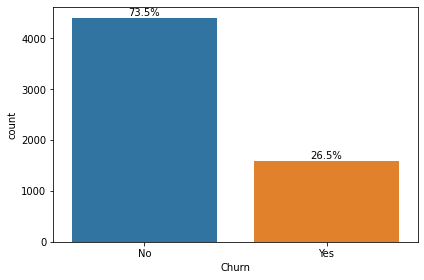

In [25]:
# Plot of Target Column "Churn"
ax = sns.countplot(x='Churn', data = df_filled)

total = len(df_filled)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.tight_layout()
plt.show()

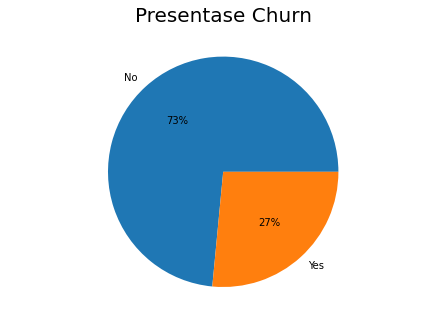

In [26]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No','Yes']
churn = df_filled.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.title("Presentase Churn", fontsize=20)
plt.show()

Dari gambar diatas dapat dilihat bahwa sebaran data secara keseluruhan customer cenderung tidak melakukan churn, dengan detail churn sebanyak 26.5% dan NO churn sebanyak 73.5%

**Exploratory Data Analysis (EDA) Variabel Kategorik**

In [27]:
# filter object dtype column
object1 = df_filled.select_dtypes(include = 'object').columns
object1

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

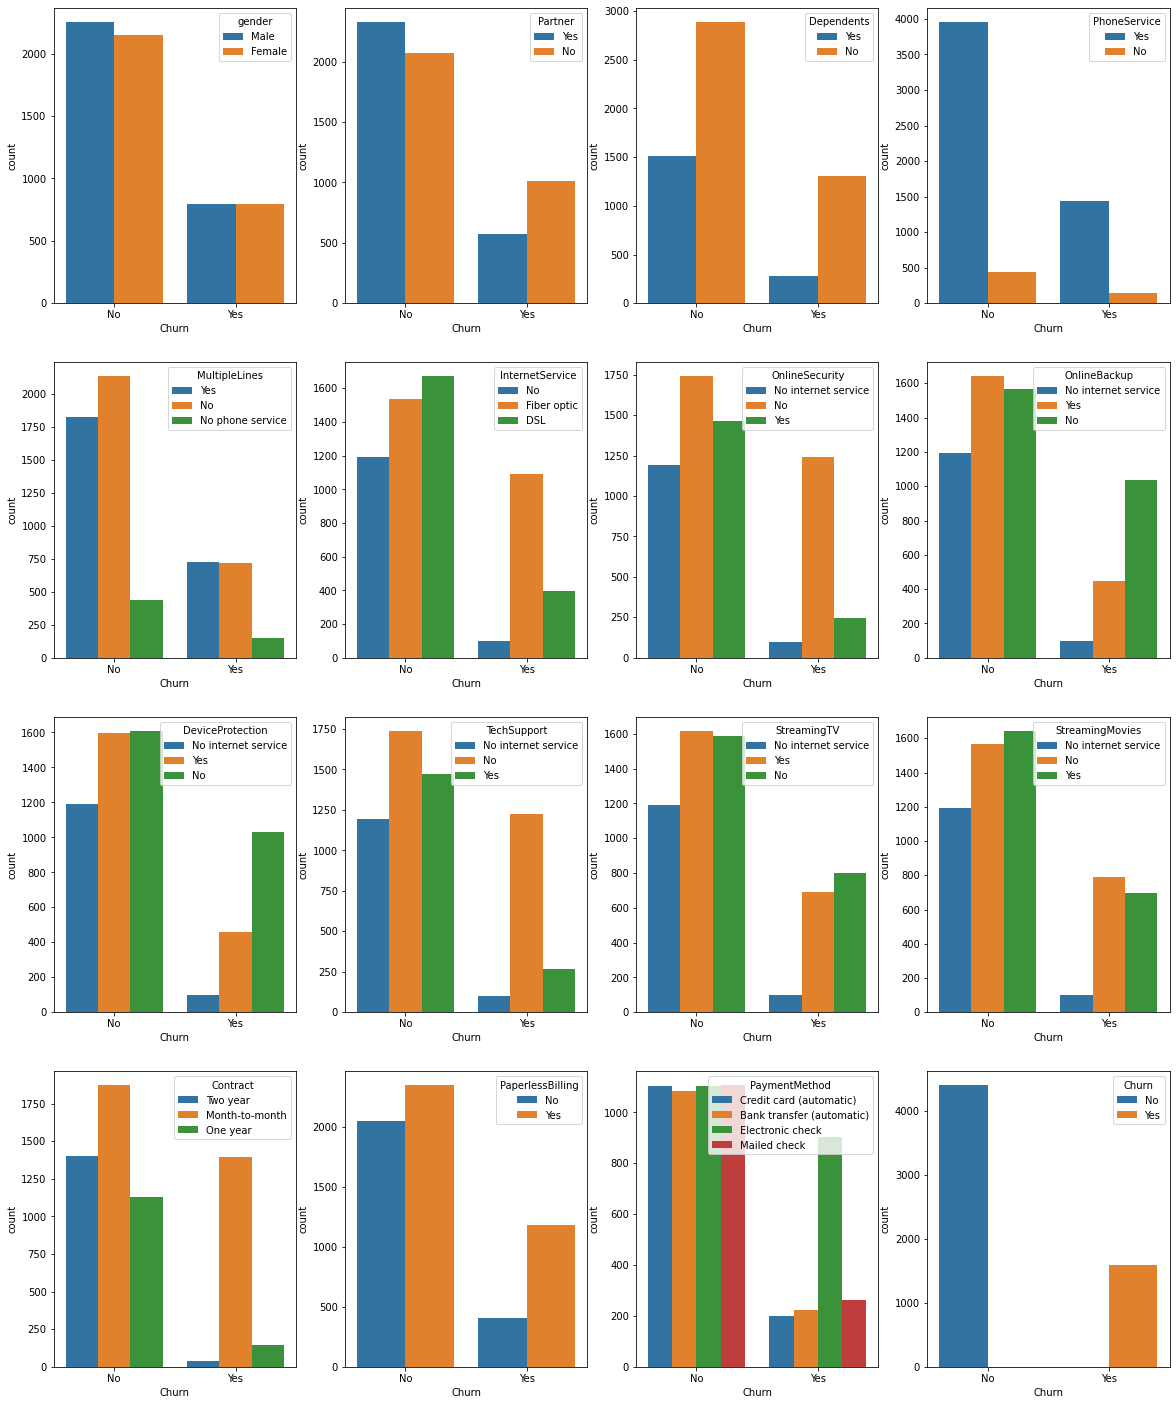

In [28]:
# Visualization of basis of Churn
i = 1
plt.figure(figsize = (20,25))
for col in object1:
    plt.subplot(4,4,i)
    sns.countplot(x = 'Churn',hue = df_filled[col] , data = df_filled)
    i +=1

**Exploratory Data Analysis (EDA) Variabel Numerik**

Displot perbandingan jumlah Churn pada setiap variabel numerik.

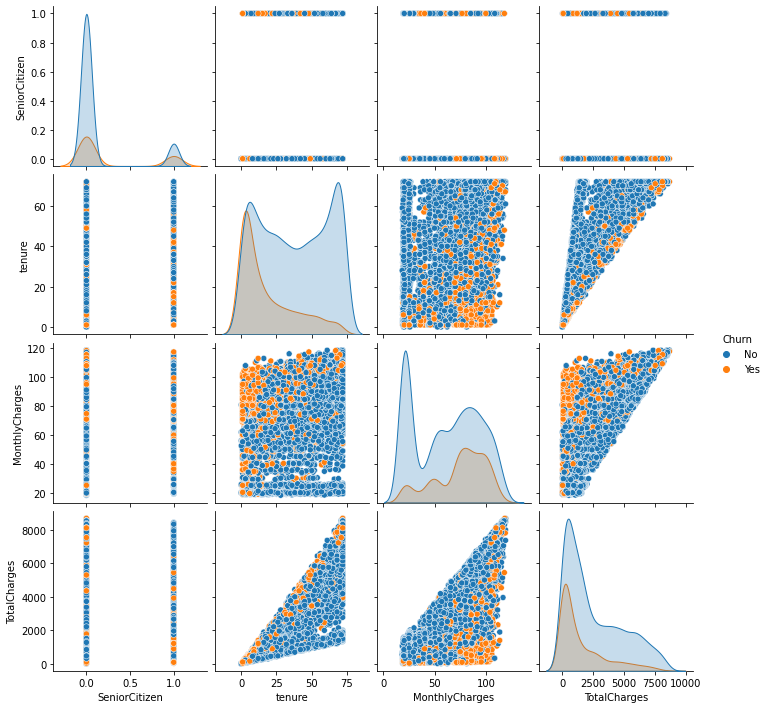

In [29]:
sns.pairplot(df_filled,hue = 'Churn')

In [30]:
# filter float  dtype column
float1 = df_filled.select_dtypes(exclude = 'object').columns
float1

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

### Boxplot

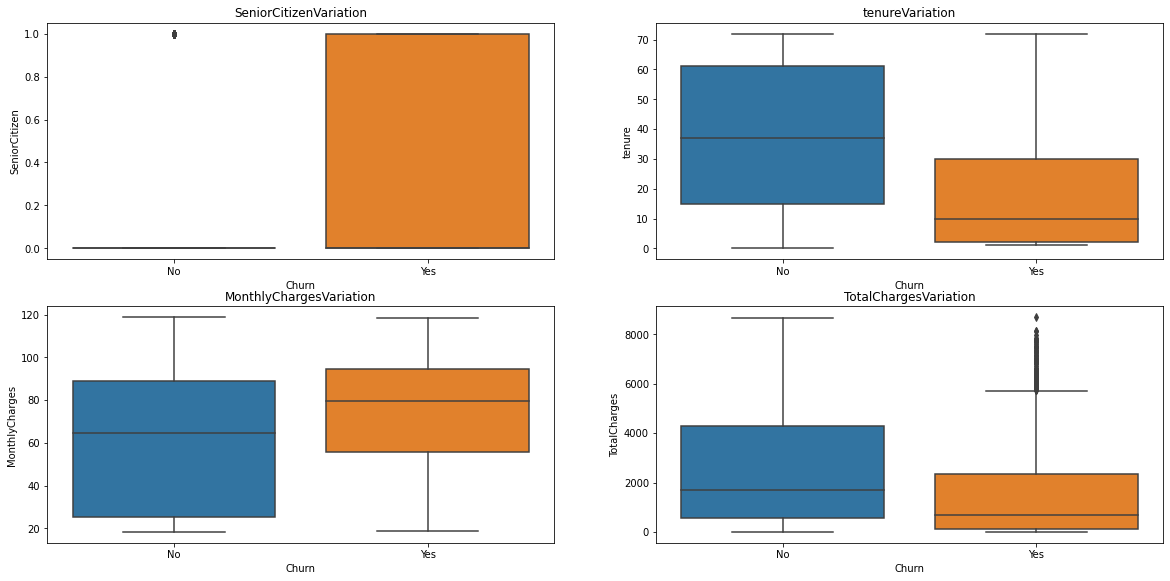

In [31]:
plt.figure(figsize=(20,20))
n= 1
for col in float1:
    plt.subplot(4,2,n)
    sns.boxplot(x='Churn', y= col, data=df_filled)
    plt.title(col + 'Variation')
    n=n+1

### Handle Categorical Variable

In [32]:
# check value in dtype object column
cat_col = []
def print_unique_col_values(df_filled):
    for column in df_filled:
        if df_filled[column].dtypes=='object':
            cat_col.append(column)
            print(f'{column} : {df_filled[column].unique()}')
print_unique_col_values(df_filled)
print(cat_col)

gender : ['Male' 'Female']
Partner : ['Yes' 'No']
Dependents : ['Yes' 'No']
PhoneService : ['Yes' 'No']
MultipleLines : ['Yes' 'No' 'No phone service']
InternetService : ['No' 'Fiber optic' 'DSL']
OnlineSecurity : ['No internet service' 'No' 'Yes']
OnlineBackup : ['No internet service' 'Yes' 'No']
DeviceProtection : ['No internet service' 'Yes' 'No']
TechSupport : ['No internet service' 'No' 'Yes']
StreamingTV : ['No internet service' 'Yes' 'No']
StreamingMovies : ['No internet service' 'No' 'Yes']
Contract : ['Two year' 'Month-to-month' 'One year']
PaperlessBilling : ['No' 'Yes']
PaymentMethod : ['Credit card (automatic)' 'Bank transfer (automatic)' 'Electronic check'
 'Mailed check']
Churn : ['No' 'Yes']
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [33]:
# replace value in specific column
df_filled.replace('No internet service','No',inplace=True)
df_filled.replace('No phone service','No',inplace=True)

In [34]:
# check value in dtype object column
print_unique_col_values(df_filled)

gender : ['Male' 'Female']
Partner : ['Yes' 'No']
Dependents : ['Yes' 'No']
PhoneService : ['Yes' 'No']
MultipleLines : ['Yes' 'No']
InternetService : ['No' 'Fiber optic' 'DSL']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['No' 'Yes']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Two year' 'Month-to-month' 'One year']
PaperlessBilling : ['No' 'Yes']
PaymentMethod : ['Credit card (automatic)' 'Bank transfer (automatic)' 'Electronic check'
 'Mailed check']
Churn : ['No' 'Yes']


In [35]:
cat_col = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
one_hot_col = ['InternetService','Contract','PaymentMethod']

In [36]:
# convert the categorical datasets to 0 and 1
lb = LabelEncoder()
for i in cat_col:
   df_filled[i] = lb.fit_transform(df_filled[i])

In [37]:
df_final = pd.get_dummies(data=df_filled,columns=one_hot_col)

In [38]:
df_final.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,1,72,1,1,0,0,0,0,0,0,0,24.10,1734.65,0,0,0,1,0,0,1,0,1,0,0
1,0,0,0,0,44,1,0,0,1,1,0,1,0,1,88.15,3973.20,0,0,1,0,1,0,0,0,1,0,0
2,0,1,1,0,38,1,1,0,0,0,0,0,0,1,74.95,2869.85,1,0,1,0,1,0,0,1,0,0,0
3,1,0,0,0,4,1,0,0,0,0,0,0,1,1,55.90,238.50,0,1,0,0,1,0,0,0,0,1,0
4,1,0,0,0,2,1,0,1,0,1,0,0,0,0,53.45,119.50,0,1,0,0,1,0,0,0,0,1,0


In [39]:
df_final.shape

(5986, 27)

### Data Standardization

In [40]:
# colums to scale
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

In [41]:
# scale data
scaler = MinMaxScaler()

df_final[cols_to_scale] = scaler.fit_transform(df_final[cols_to_scale])

In [42]:
df_final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,1,1.000000,1,1,0,0,0,0,0,0,0,0.058209,0.199734,0,0,0,1,0,0,1,0,1,0,0
1,0,0,0,0,0.611111,1,0,0,1,1,0,1,0,1,0.695522,0.457489,0,0,1,0,1,0,0,0,1,0,0
2,0,1,1,0,0.527778,1,1,0,0,0,0,0,0,1,0.564179,0.330445,1,0,1,0,1,0,0,1,0,0,0
3,1,0,0,0,0.055556,1,0,0,0,0,0,0,1,1,0.374627,0.027462,0,1,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0.027778,1,0,1,0,1,0,0,0,0,0.350249,0.013760,0,1,0,0,1,0,0,0,0,1,0


In [43]:
# check simple statistic of the numeric value
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,5986.0,0.509522,0.499951,0.0,0.000000,1.000000,1.000000,1.0
SeniorCitizen,5986.0,0.161377,0.367909,0.0,0.000000,0.000000,0.000000,1.0
Partner,5986.0,0.485132,0.499821,0.0,0.000000,0.000000,1.000000,1.0
Dependents,5986.0,0.299198,0.457945,0.0,0.000000,0.000000,1.000000,1.0
tenure,5986.0,0.450955,0.340505,0.0,0.125000,0.402778,0.777778,1.0
PhoneService,5986.0,0.901437,0.298100,0.0,1.000000,1.000000,1.000000,1.0
MultipleLines,5986.0,0.425660,0.494484,0.0,0.000000,0.000000,1.000000,1.0
OnlineSecurity,5986.0,0.286168,0.452007,0.0,0.000000,0.000000,1.000000,1.0
OnlineBackup,5986.0,0.349148,0.476741,0.0,0.000000,0.000000,1.000000,1.0
DeviceProtection,5986.0,0.343301,0.474851,0.0,0.000000,0.000000,1.000000,1.0


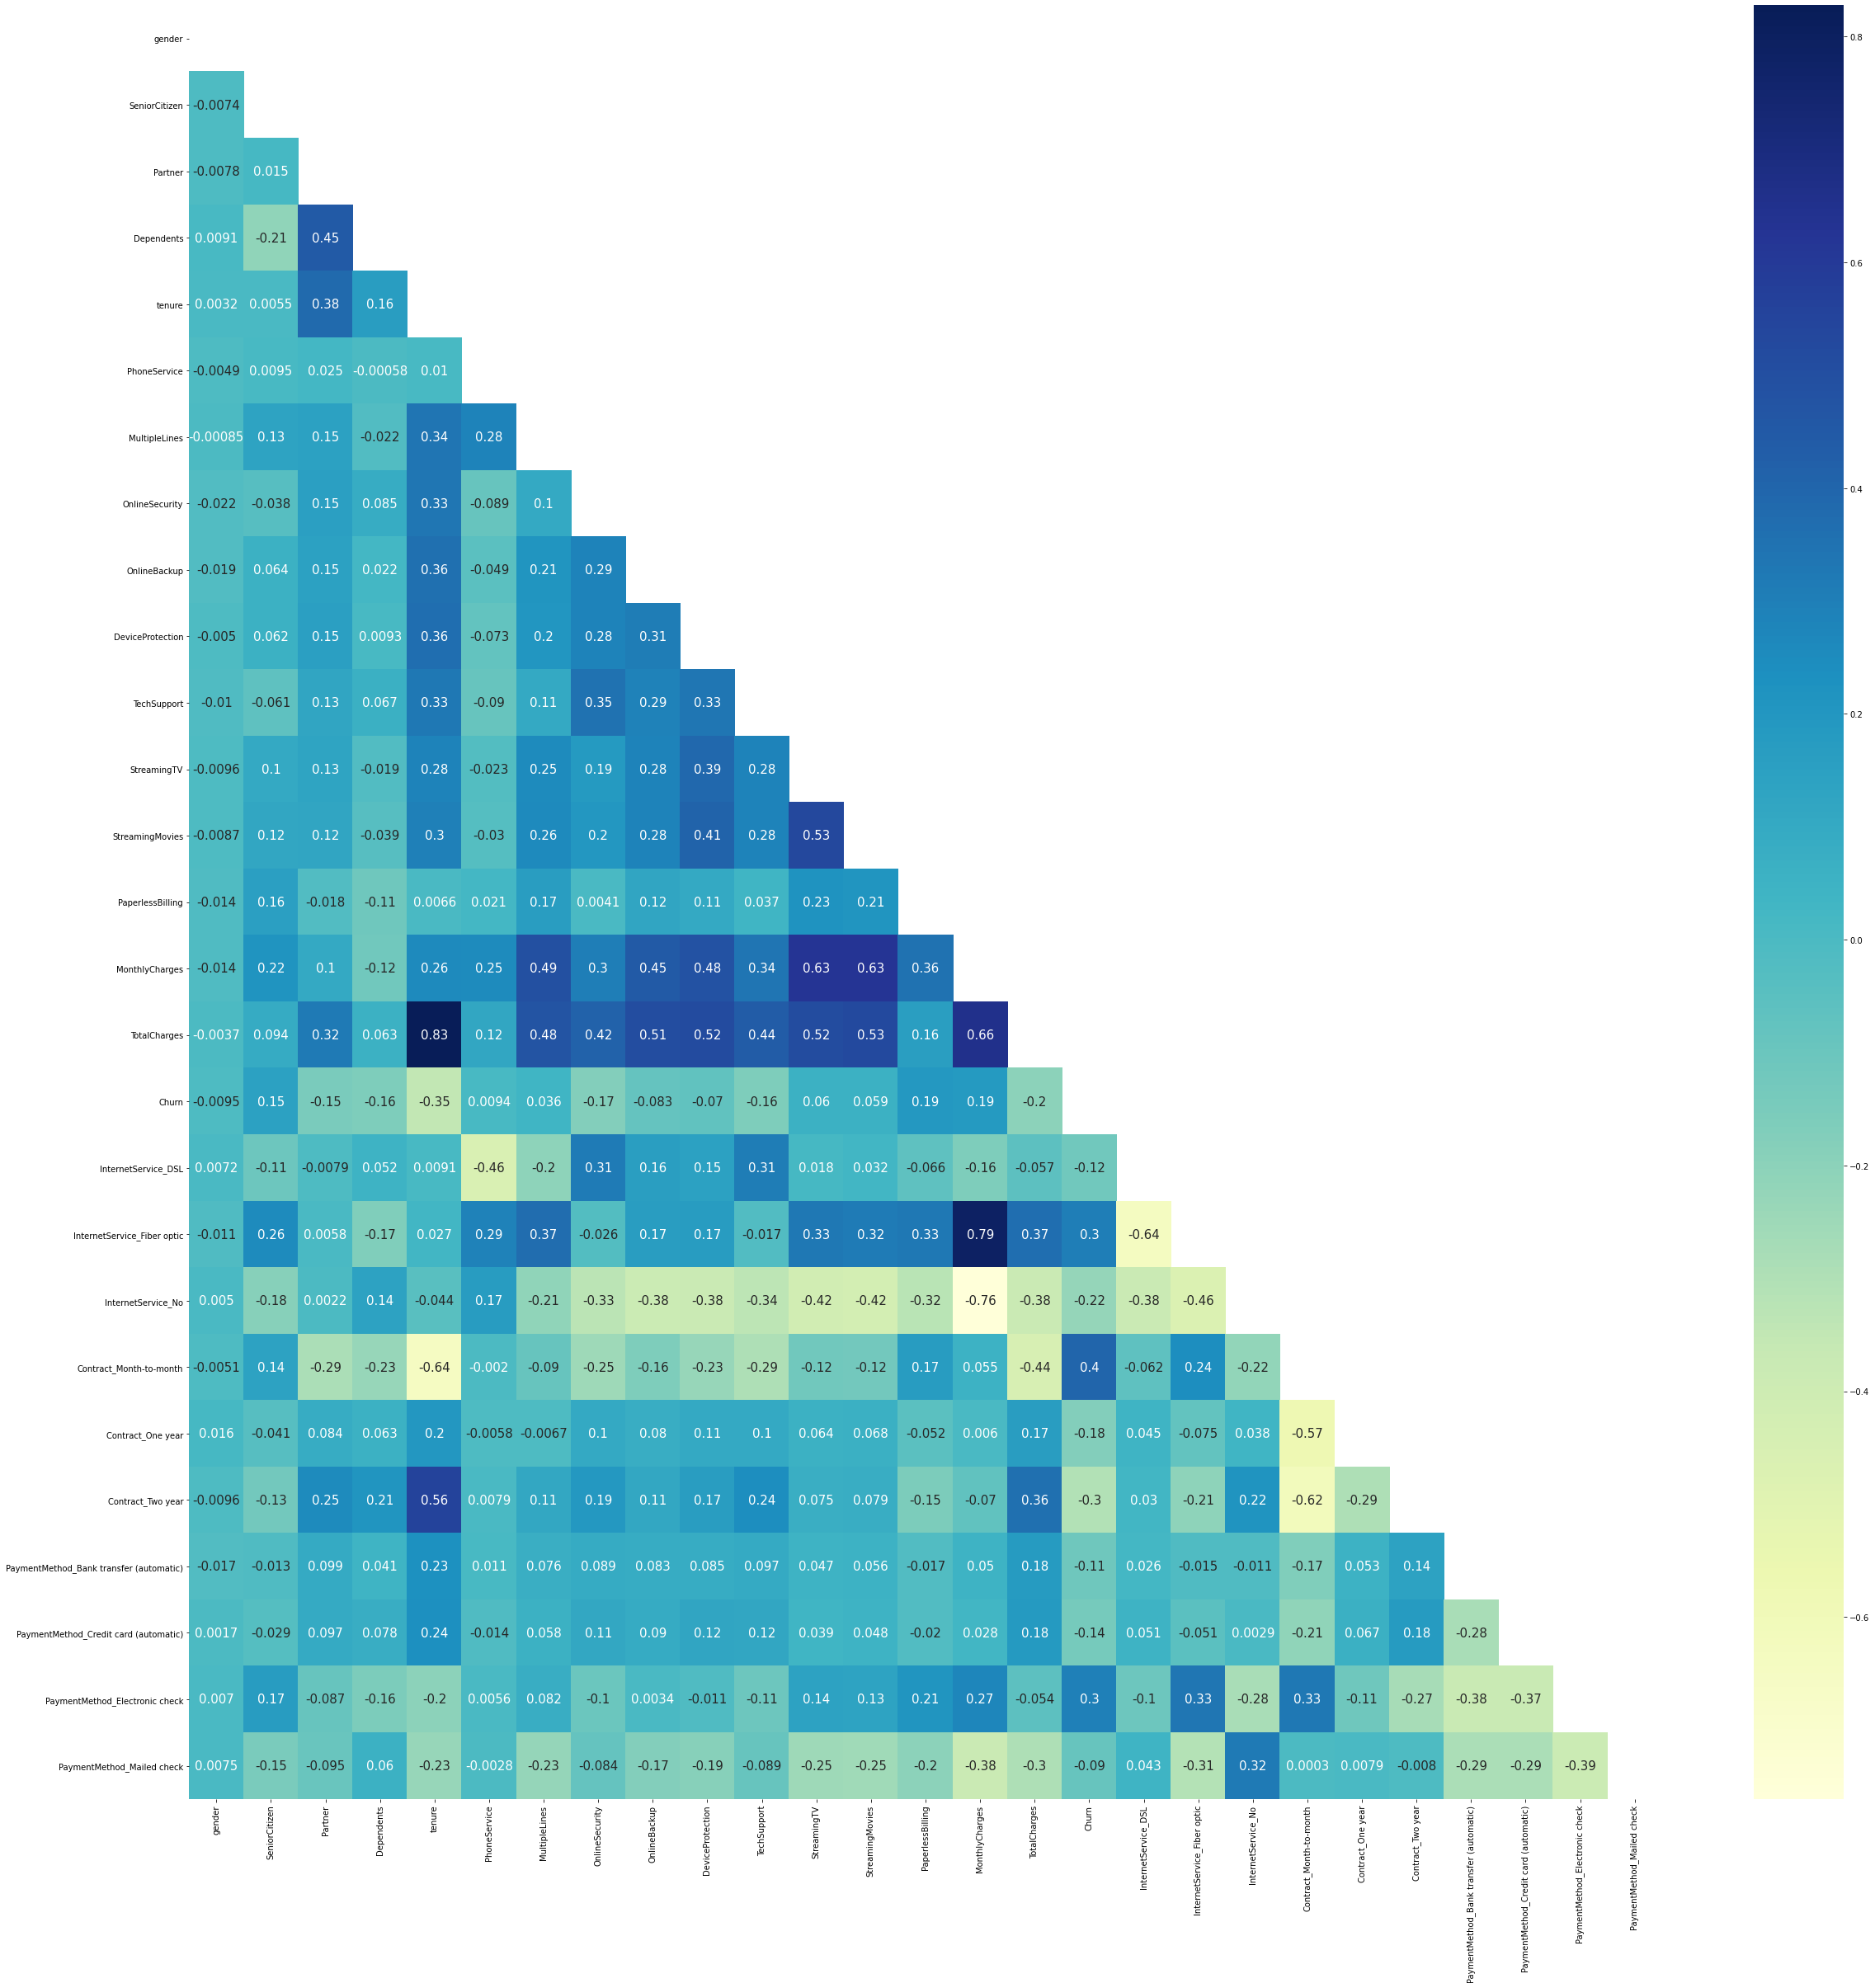

In [44]:
# check correlation between column
corr = df_final.corr()
upper_triangle_corr = np.triu(corr)

fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(corr, annot = True, cmap="YlGnBu",ax=ax,annot_kws={"size":15},mask=upper_triangle_corr)

In [45]:
final_feature_column = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                  'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                  'StreamingMovies', 'PaperlessBilling', 'InternetService_DSL', 
                  'InternetService_Fiber optic','InternetService_No',
                  'Contract_Month-to-month', 'Contract_One year', 
                  'PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)',
                  'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
target_column = ['Churn']
final_column = final_feature_column+target_column
final_df = df_final[final_column]

In [46]:
final_df.shape

(5986, 24)

In [47]:
final_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,0,1,1,1.000000,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0.611111,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0
2,0,1,1,0,0.527778,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1
3,1,0,0,0,0.055556,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0
4,1,0,0,0,0.027778,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,0,1,0,0.013889,1,0,1,0,0,0,1,1,1,0,1,0,1,0,0,0,1,0,1
5982,0,0,1,1,0.319444,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0
5983,1,0,1,1,0.166667,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0
5984,1,1,0,0,0.166667,1,1,0,0,1,0,1,1,1,0,1,0,1,0,0,0,1,0,1


# 4. Modeling

In [48]:
# prepare the data to numpy array
final_feature_array = final_df[final_feature_column].to_numpy()
target_array = final_df[target_column].to_numpy()
print('shape of final feature:',final_feature_array.shape)
print('shape of target:',target_array.shape)

shape of final feature: (5986, 23)
shape of target: (5986, 1)


In [49]:
# split the data into test and train
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    final_feature_array,
    target_array,
    train_size=0.8,
    random_state=0
    )

In [50]:
# check the shape data
print('Shape Data X Train:')
print(X_train.shape)
print('\nShape Data X Test:')
print(X_test.shape)
print('\nShape Data y Train:')
print(y_train.shape)
print('\nShape Data y Test:')
print(y_test.shape)

Shape Data X Train:
(4788, 23)

Shape Data X Test:
(1198, 23)

Shape Data y Train:
(4788, 1)

Shape Data y Test:
(1198, 1)


## Logistic Regression

In [51]:
# import package
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [52]:
# load the algorithm & train the data
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
# predict the X using trained model
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)
target_array_pred = classifier.predict(final_feature_array)

In [54]:
# check the raw prediction data & compare with real data
print('Real Data')
print(y_train[:5])
print('\n Predicted Data')
print(y_train_pred[:5])

Real Data
[[1]
 [0]
 [0]
 [0]
 [0]]

 Predicted Data
[1 0 0 0 0]


In [55]:
# check the data in the form of dataframe
final_with_pred_df = final_df.copy()
final_with_pred_df['churn_predicted'] = target_array_pred.reshape(-1,)
final_with_pred_df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,churn_predicted
0,1,0,1,1,1.000000,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0.611111,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0
2,0,1,1,0,0.527778,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0
3,1,0,0,0,0.055556,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,1
4,1,0,0,0,0.027778,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0


In [56]:
# Analisa Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix')
print(cm)
print('\n Accuracy Score')
accuracy_score(y_test, y_test_pred)

Confusion Matrix
[[799  84]
 [137 178]]

 Accuracy Score


0.8155258764607679

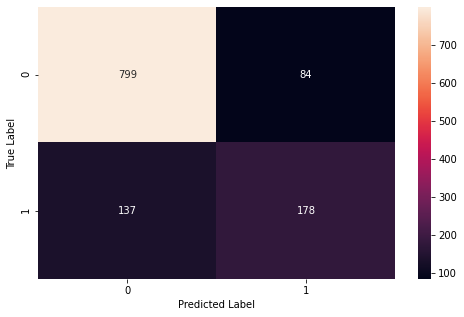

In [57]:
# visualisasi confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

TN | FP

FN | TP


In [58]:
# Performance Metrics
from sklearn.metrics import classification_report
print (classification_report(y_test, y_test_pred))
roc_auc_score(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       883
           1       0.68      0.57      0.62       315

    accuracy                           0.82      1198
   macro avg       0.77      0.73      0.75      1198
weighted avg       0.81      0.82      0.81      1198



0.7349745636268852

## K-Nearest Neighbour

In [59]:
# load the algorithm
classifier1 = neighbors.KNeighborsClassifier(n_neighbors=10)

In [60]:
# train the data
classifier1.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [61]:
# predict the X using trained model
y_train_pred1 = classifier1.predict(X_train)
y_test_pred1 = classifier1.predict(X_test)
target_array_pred1 = classifier1.predict(final_feature_array)

In [62]:
# check the raw prediction data & compare with real data
print('Real Data')
print(y_train[:5])
print('\n Predicted Data')
print(y_train_pred1[:5])

Real Data
[[1]
 [0]
 [0]
 [0]
 [0]]

 Predicted Data
[1 0 0 0 0]


In [63]:
# check the data in the form of dataframe
final_with_pred_df1 = final_df.copy()
final_with_pred_df1['churn_predicted'] = target_array_pred1.reshape(-1,)
final_with_pred_df1.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,churn_predicted
0,1,0,1,1,1.000000,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0.611111,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
2,0,1,1,0,0.527778,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0
3,1,0,0,0,0.055556,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0
4,1,0,0,0,0.027778,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1


In [64]:
# from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred1)
print('Confusion Matrix')
print(cm)
print('\n Accuracy Score')
accuracy_score(y_test, y_test_pred1)

Confusion Matrix
[[793  90]
 [172 143]]

 Accuracy Score


0.7813021702838063

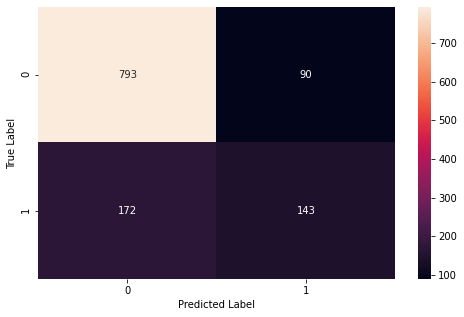

In [65]:
# visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_test_pred1), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

TN | FP

FN | TP

In [66]:
# Performance Metrics
from sklearn.metrics import classification_report
print (classification_report(y_test, y_test_pred1))
roc_auc_score(y_test, y_test_pred1)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       883
           1       0.61      0.45      0.52       315

    accuracy                           0.78      1198
   macro avg       0.72      0.68      0.69      1198
weighted avg       0.77      0.78      0.77      1198



0.6760214995775584

## Random Forest

In [67]:
# load the algorithm & train the data
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [68]:
# predict the X using trained model
y_train_pred2 = classifier2.predict(X_train)
y_test_pred2 = classifier2.predict(X_test)
target_array_pred2 = classifier2.predict(final_feature_array)

In [69]:
# check the raw prediction data & compare with real data
print('Real Data')
print(y_train[:5])
print('\n Predicted Data')
print(y_train_pred2[:5])

Real Data
[[1]
 [0]
 [0]
 [0]
 [0]]

 Predicted Data
[1 0 0 0 0]


In [70]:
# check the data in the form of dataframe
final_with_pred_df2 = final_df.copy()
final_with_pred_df2['churn_predicted'] = target_array_pred2.reshape(-1,)
final_with_pred_df2.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,churn_predicted
0,1,0,1,1,1.000000,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0.611111,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0
2,0,1,1,0,0.527778,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,1
3,1,0,0,0,0.055556,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0
4,1,0,0,0,0.027778,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0


In [71]:
# from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred2)
print('Confusion Matrix')
print(cm)
print('\n Accuracy Score')
accuracy_score(y_test, y_test_pred2)

Confusion Matrix
[[785  98]
 [167 148]]

 Accuracy Score


0.7787979966611018

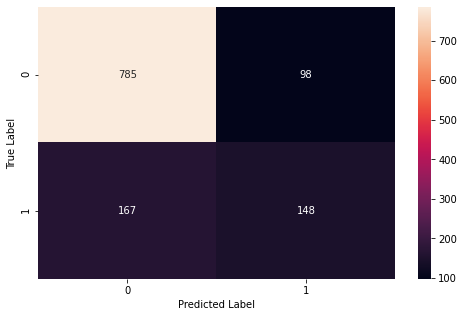

In [72]:
# visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_test_pred2), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

TN | FP

FN | TP

In [73]:
# Performance Metrics
from sklearn.metrics import classification_report
print (classification_report(y_test, y_test_pred2))
roc_auc_score(y_test, y_test_pred2)

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       883
           1       0.60      0.47      0.53       315

    accuracy                           0.78      1198
   macro avg       0.71      0.68      0.69      1198
weighted avg       0.77      0.78      0.77      1198



0.6794279961890382

## Naive Bayes

In [74]:
# load the algorithm & train the data
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [75]:
# predict the X using trained model
y_train_pred3 = classifier3.predict(X_train)
y_test_pred3 = classifier3.predict(X_test)
target_array_pred3 = classifier3.predict(final_feature_array)

In [76]:
# check the raw prediction data & compare with real data
print('Real Data')
print(y_train[:5])
print('\n Predicted Data')
print(y_train_pred3[:5])

Real Data
[[1]
 [0]
 [0]
 [0]
 [0]]

 Predicted Data
[1 0 1 0 0]


In [77]:
# check the data in the form of dataframe
final_with_pred_df3 = final_df.copy()
final_with_pred_df3['churn_predicted'] = target_array_pred3.reshape(-1,)
final_with_pred_df3.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,churn_predicted
0,1,0,1,1,1.000000,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0.611111,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
2,0,1,1,0,0.527778,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,1
3,1,0,0,0,0.055556,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,1
4,1,0,0,0,0.027778,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1


In [78]:
# from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred3)
print('Confusion Matrix')
print(cm)
print('\n Accuracy Score')
accuracy_score(y_test, y_test_pred3)

Confusion Matrix
[[686 197]
 [ 81 234]]

 Accuracy Score


0.7679465776293823

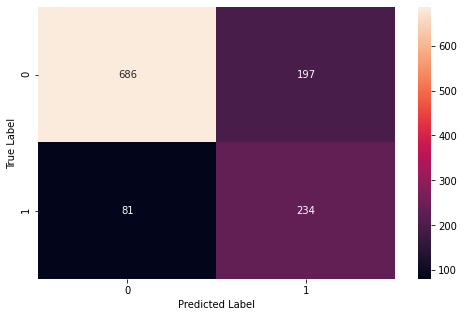

In [79]:
# visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_test_pred3), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

TN | FP

FN | TP

In [80]:
# Performance Metrics
print (classification_report(y_test, y_test_pred3))
roc_auc_score(y_test, y_test_pred3)

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       883
           1       0.54      0.74      0.63       315

    accuracy                           0.77      1198
   macro avg       0.72      0.76      0.73      1198
weighted avg       0.80      0.77      0.78      1198



0.7598770425497492

## Decision Tree

In [81]:
# load the algorithm & train the data
from sklearn.tree import DecisionTreeClassifier
classifier4 = DecisionTreeClassifier()
classifier4.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [82]:
# predict the X using trained model
y_train_pred4 = classifier4.predict(X_train)
y_test_pred4 = classifier4.predict(X_test)
target_array_pred4 = classifier4.predict(final_feature_array)

In [83]:
# check the raw prediction data & compare with real data
print('Real Data')
print(y_train[:5])
print('\n Predicted Data')
print(y_train_pred4[:5])

Real Data
[[1]
 [0]
 [0]
 [0]
 [0]]

 Predicted Data
[1 0 0 0 0]


In [84]:
# check the data in the form of dataframe
final_with_pred_df4 = final_df.copy()
final_with_pred_df4['churn_predicted'] = target_array_pred4.reshape(-1,)
final_with_pred_df4.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,churn_predicted
0,1,0,1,1,1.000000,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0.611111,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0
2,0,1,1,0,0.527778,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,1
3,1,0,0,0,0.055556,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0
4,1,0,0,0,0.027778,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0


In [85]:
# from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred4)
print('Confusion Matrix')
print(cm)
print('\n Accuracy Score')
accuracy_score(y_test, y_test_pred4)

Confusion Matrix
[[713 170]
 [172 143]]

 Accuracy Score


0.7145242070116862

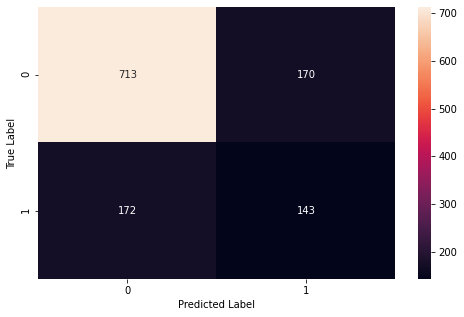

In [86]:
# visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_test_pred4), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

TN | FP

FN | TP

In [87]:
# Performance Metrics
print(classification_report(y_test, y_test_pred4))
roc_auc_score(y_test, y_test_pred4)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       883
           1       0.46      0.45      0.46       315

    accuracy                           0.71      1198
   macro avg       0.63      0.63      0.63      1198
weighted avg       0.71      0.71      0.71      1198



0.6307213863272753

## Analisa Confusion Matrix



TN = True Negative 

Intepretasi : Kita memprediksi negatif dan itu benar.
Artinya kita memprediksi bahwa customer yang tidak churn dan memang benar customer tsb tidak churn

TP = True Positive

Intepretasi : Kita memprediksi positif dan itu benar.
Artinya kita memprediksi bahwa customer yang churn dan memang benar churn.

FP = False Positive (Kesalahan Tipe 1)

Intepretasi : Kita memprediksi positif dan itu salah.
Artinya kita memprediksi bahwa customer yang churn dan ternyata prediksi salah ternyata customer tidak churn

FN = False Negative (Kesalahan Tipe 2, kesalahan tipe ini sangat berbahaya)

Intepretasi : Kita memprediksi negatif dan itu salah. 
Artinya kita memprediksi bahwa customer yang tidak churn dan ternyata prediksi salah ternyata customer ternyata churn.  

# 5. Evaluation

Plotting and Comparing The Accuracies of The Different Models

Accuracy tepat kita gunakan sebagai acuan performansi algoritma jika dataset kita memiliki jumlah data False Negatif dan False Positif yang sangat mendekati (symmetric). Namun jika jumlahnya tidak mendekati, maka sebaiknya kita menggunakan F1 Score sebagai acuan.

Maka dari itu comparing ini kita menggunakan accuracy.

In [88]:
acc=[accuracy_score(y_test, y_test_pred),accuracy_score(y_test, y_test_pred1),accuracy_score(y_test, y_test_pred2),accuracy_score(y_test, y_test_pred3),accuracy_score(y_test, y_test_pred4)]

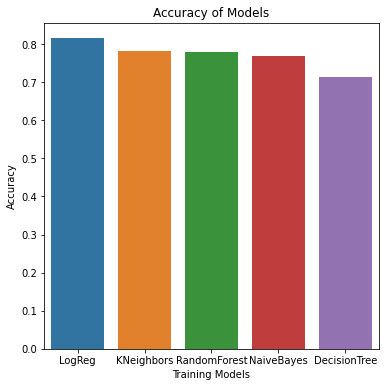

In [89]:
plt.figure(figsize= (6,6))
sns.barplot(x= ['LogReg','KNeighbors','RandomForest','NaiveBayes','DecisionTree'], y= acc)
plt.title('Accuracy of Models')
plt.xlabel('Training Models')
plt.ylabel('Accuracy')
plt.show()

Berdasarkan ploting dan compairing akurasi model di atas, bisa disimpulkan bahwa model yang paling baik akurasinya adalah model Logistic Regression.

## The summary Logistic Regression

Ringkasan di bawah ini, memberi kita ringkasan deskriptif tentang hasil regresi logistik.


In [90]:
# building the model and fitting the data
import statsmodels.api as sm
log_reg = sm.Logit(y_train, X_train).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.420458
         Iterations 8


In [91]:
# printing the summary table
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4788
Model:                          Logit   Df Residuals:                     4766
Method:                           MLE   Df Model:                           21
Date:                Thu, 17 Jun 2021   Pseudo R-squ.:                  0.2737
Time:                        02:17:57   Log-Likelihood:                -2013.2
converged:                       True   LL-Null:                       -2771.8
Covariance Type:            nonrobust   LLR p-value:                7.071e-309
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0771      0.078     -0.986      0.324      -0.230       0.076
x2             0.1922      0.102      1.882      0.060      -0.008       0.392
x3             0.0522      0.094      0.556      0.5

Explanation of some of the terms in the summary table:

* coef : the coefficients of the independent variables in the regression equation.
* Log-Likelihood : the natural logarithm of the Maximum Likelihood Estimation(MLE) function. MLE is the optimisation process of finding the set of parameters which result in best fit.
* LL-Null : the value of log-likelihood of the model when no independent variable is included(only an intercept is included).
* Pseudo R-squ. : a substitute for the R-squared value in Least Squares linear regression. It is the ratio of the log-likelihood of the null model to that of the full model.
* LLR: The LLR test generally compares a more restricted model and is computed as:
* z-statistic: plays the same role as the t-statistic in the linear regression output and is equally computed as the ratio of the coefficient estimate and its standard error.
* p-values: these indicate the probability of observing the test statistic assuming the null hypothesis H0 that the population coefficient is zero.

### Feature importance

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


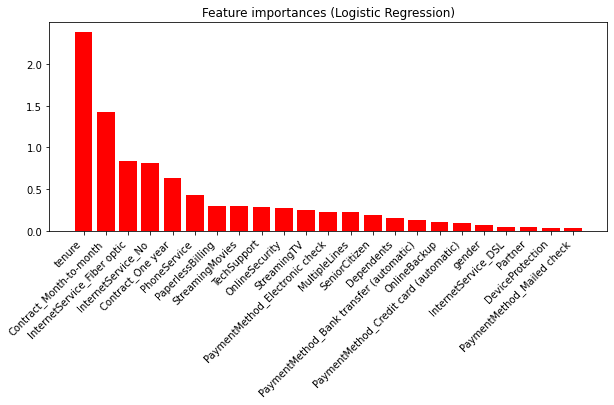

In [92]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(max_iter=3000)
clf.fit(X_train, y_train)
coefs = np.abs(clf.coef_[0])
indices = np.argsort(coefs)[::-1]

plt.figure(figsize= (10,5))
plt.title("Feature importances (Logistic Regression)")
plt.bar(range(23), coefs[indices[:23]], color="r", align="center")
plt.xticks(range(23), final_df.columns[indices[:23]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

plt.ion(); plt.show()

Kesimpulan dari ‘Feature Importance’ yang didapat :
1. Fitur terbaik untuk memprediksi Churn secara andal adalah ‘tenure’. Setelah itu ada 5 fitur yang terbaik yang mengikuti diantaranya : Contract_Month-to-month, Internet_Fiber optic, InternetService_No, Contract_One year dan PhoneService.
2. PaymentMethod_Mailed Chek nampaknya tidak begitu andal untuk memprediksi Churn.
3. Dari ‘Feature Importance’ yang di tampilkan tidak serta merta kita sebagai penyedia layanan mengabaikan variabel yang lain. Melihat dari sisi kepentingan secara keseluruhan pelanggan berbeda-beda.



# 6. Peningkatan akurasi model menggunakan Grid Search





## Cek performa tuning sebelum dilakukan tuning hyperparameter

In [93]:
# Performance Metrics LogRes sebelum dilakukan Tuning hyperparameter
from sklearn.metrics import roc_auc_score
print (classification_report(y_test, y_test_pred))
roc_auc_score(y_test, y_test_pred)

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       883
           1       0.68      0.57      0.62       315

    accuracy                           0.82      1198
   macro avg       0.77      0.73      0.75      1198
weighted avg       0.81      0.82      0.81      1198



0.7349745636268852

In [205]:
# Analisa Confusion Matrix sebelum dilakukan Tuning hyperparameter
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix')
print(cm)
print('\n Accuracy Score')
accuracy_score(y_test, y_test_pred)

Confusion Matrix
[[799  84]
 [137 178]]

 Accuracy Score


0.8155258764607679

## Melakukan Tuning Hyperparameters Logistic Regression Menggunakan Grid Search.

In [113]:
#List Hyperparameters yang akan diuji
penalty = ['l1', 'l2']
C = np.logspace(-4,4,20)
# C = [100, 10, 1.0, 0.1, 0.01]
# C = [0.001, 0.1, 1, 5, 10]
solver = ['newton-cg','lbfgs','liblinear']

In [114]:
#Menjadikan ke dalam bentuk dictionary
hyperparameters = dict(solver=solver, penalty=penalty, C=C)

In [116]:
#Membuat Object Logistic Regression
logreg = LogisticRegression()

In [117]:
from sklearn.model_selection import GridSearchCV

In [206]:
#Memasukan ke Grid Search
#CV itu Cross Validation
#Menggunakan 10-Fold CV
clf = GridSearchCV(logreg, hyperparameters, n_jobs=-1, cv=10, scoring='accuracy', error_score=0)

In [207]:
#Fitting Model
best_model = clf.fit(X_train, np.ravel(y_train))

In [208]:
#Prediksi menggunakan model baru
y_pred_gs = best_model.predict(X_test)

In [209]:
#Nilai hyperparameters terbaik
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 0.23357214690901212


In [210]:
#Check performa dari model
print(classification_report(y_test, y_pred_gs))
roc_auc_score(y_test, y_pred_gs)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       883
           1       0.68      0.55      0.61       315

    accuracy                           0.81      1198
   macro avg       0.76      0.73      0.74      1198
weighted avg       0.80      0.81      0.81      1198



0.7291916086933075

In [204]:
# Analisa Confusion Matrix setelah melakukan tuning
cm = confusion_matrix(y_test, y_pred_gs)
print('Confusion Matrix')
print(cm)
print('\n Accuracy Score')
accuracy_score(y_test, y_test_pred)

Confusion Matrix
[[800  83]
 [141 174]]

 Accuracy Score


0.8130217028380634

### Perbandingan dataframe sebelum dan sesudah dilakukan tuning hyperparameter.

In [169]:
# check the data in the form of dataframe model LogReg
final_with_pred_lr = final_df.copy()
final_with_pred_lr['churn_predicted'] = target_array_pred.reshape(-1,)
final_with_pred_lr

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,churn_predicted
0,1,0,1,1,1.000000,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0.611111,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0
2,0,1,1,0,0.527778,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0
3,1,0,0,0,0.055556,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,1
4,1,0,0,0,0.027778,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,0,1,0,0.013889,1,0,1,0,0,0,1,1,1,0,1,0,1,0,0,0,1,0,1,1
5982,0,0,1,1,0.319444,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0
5983,1,0,1,1,0.166667,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0
5984,1,1,0,0,0.166667,1,1,0,0,1,0,1,1,1,0,1,0,1,0,0,0,1,0,1,1


In [158]:
df_cp = final_with_pred_lr.loc[:, ['Churn', 'churn_predicted']]
df_cp

,Churn,churn_predicted
0,0,0
1,0,0
2,1,0
3,0,1
4,0,0
...,...,...
5981,1,1
5982,0,0
5983,0,0
5984,1,1


In [201]:
cp_lr_true = df_cp[df_cp['Churn']==df_cp['churn_predicted']].count()
cp_lr_true

Churn              4804
churn_predicted    4804
dtype: int64

In [202]:
cp_lr_false = df_cp[df_cp['Churn']!=df_cp['churn_predicted']].count()
cp_lr_false

Churn              1182
churn_predicted    1182
dtype: int64

**Sesudah melakukan tuning hyperparameter**

In [161]:
# prediksi target menggunakan model baru
target_array_gs = best_model.predict(final_feature_array)

In [162]:
# check the data in the form of dataframe model LogReg
final_with_pred_gs = final_with_pred_lr.copy()
final_with_pred_gs['churn_predicted_gs'] = target_array_gs.reshape(-1,)
final_with_pred_gs

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,churn_predicted,churn_predicted_gs
0,1,0,1,1,1.000000,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0.611111,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0
2,0,1,1,0,0.527778,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0
3,1,0,0,0,0.055556,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,1,1
4,1,0,0,0,0.027778,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,0,1,0,0.013889,1,0,1,0,0,0,1,1,1,0,1,0,1,0,0,0,1,0,1,1,1
5982,0,0,1,1,0.319444,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0
5983,1,0,1,1,0.166667,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0
5984,1,1,0,0,0.166667,1,1,0,0,1,0,1,1,1,0,1,0,1,0,0,0,1,0,1,1,1


In [187]:
df_cp_gs = final_with_pred_gs.loc[:, ['Churn','churn_predicted_gs']]
df_cp_gs

,Churn,churn_predicted_gs
0,0,0
1,0,0
2,1,0
3,0,1
4,0,0
...,...,...
5981,1,1
5982,0,0
5983,0,0
5984,1,1


In [164]:
cp_gs_true = df_cp_gs[df_cp_gs['Churn']==df_cp_gs['churn_predicted_gs']].count()
cp_gs_true

Churn                 4809
churn_predicted_gs    4809
dtype: int64

In [165]:
cp_gs_false = df_cp_gs[df_cp_gs['Churn']!=df_cp_gs['churn_predicted_gs']].count()
cp_gs_false

Churn                 1177
churn_predicted_gs    1177
dtype: int64

**Tabel Perbandingan**

In [212]:
df_cp_lrgs = final_with_pred_gs.loc[:, ['Churn', 'churn_predicted', 'churn_predicted_gs']]
df_cp_lrgs

,Churn,churn_predicted,churn_predicted_gs
0,0,0,0
1,0,0,0
2,1,0,0
3,0,1,1
4,0,0,0
...,...,...,...
5981,1,1,1
5982,0,0,0
5983,0,0,0
5984,1,1,1


**Hasil Prediksi Sebelum dan Sesudah Dilakukan Tuning Hyperparameter**

In [225]:
print('Tanpa Grid Search')
print('Benar :')
print(cp_lr_true)
print('\nSalah :')
print(cp_lr_false)

print('\nDengan Grid Search')
print('Benar :')
print(cp_gs_true)
print('\nSalah :')
print(cp_gs_false)

Tanpa Grid Search
Benar :
Churn              4804
churn_predicted    4804
dtype: int64

Salah :
Churn              1182
churn_predicted    1182
dtype: int64

Dengan Grid Search
Benar :
Churn                 4809
churn_predicted_gs    4809
dtype: int64

Salah :
Churn                 1177
churn_predicted_gs    1177
dtype: int64
